In [2]:
import gc
gc.collect()

# 1.0 Call libraries
# For data manipulation
import numpy as np
import time

# 1.1 For plotting faces
import matplotlib.pyplot as plt   
from skimage.io import imshow

# 1.2 Our dataset is here
from sklearn.datasets import fetch_olivetti_faces
##Metrics
from sklearn.metrics import mean_squared_error

# 1.3 Regressors
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV

from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

from sklearn.tree import DecisionTreeRegressor

from sklearn.multioutput import MultiOutputRegressor

In [3]:
def show_image(test,X_test,y_test_predict,name,n_faces,y_mse):
    ## scattor plot
    plt.figure(figsize=(8,6))
    plt.scatter(y_test_predict[name],y_test,cmap='plasma')
    plt.title(name)
    plt.show()
    print('RMSE for ',name,' is ',y_mse[name])
    ##to plot the faces
    image_shape = (64, 64)
    plt.figure(figsize=(10,10))
    j = 0
    for i in range(n_faces):
        actual_face =    test[i].reshape(image_shape)
        completed_face = np.hstack((X_test[i], y_test_predict[name][i]))
        j = j+1
        plt.subplot(5,4,j)
        y = actual_face.reshape(image_shape)
        x = completed_face.reshape(image_shape)
        imshow(x)
        j = j+1
        plt.subplot(5,4,j)
        x = completed_face.reshape(image_shape)
        imshow(y)
    plt.show()

In [5]:
data = np.load("../olivetti_faces.npy")
data.shape

(400, 64, 64)

In [6]:
targets = np.load("../olivetti_faces_target.npy")
targets.shape

(400,)

In [7]:
# 5.0 Flatten each 
data = data.reshape(data.shape[0], data.shape[1] * data.shape[2])     # 64 X 64 = 4096mage

In [8]:
data.shape

(400, 4096)

In [9]:
# 6.0 Patition datasets into two (fancy indexing)
targets < 30                # Output is true/false
train = data[targets < 30]  # First 30 types of images out of 40 ie 30 * 10 =300
test = data[targets >= 30]  # Test on rest independent people  10 * 10 = 100

In [10]:
# 7.0 Test on a subset of people
#     Generate 8 random integers between 0 and 100
n_faces = test.shape[0]//12             # // is unconditionally "flooring division",
n_faces
face_ids = np.random.randint(0 , 100, size =n_faces)
face_ids

array([42, 36, 51,  9, 40, 81, 90, 73])

In [11]:
# 7.1 So we have n_faces random-faces from within 1 to 100
test = test[face_ids, :]

face_ids

n_faces


8

In [12]:
# 8.0 Total pixels in any image
n_pixels = data.shape[1]

In [13]:
# 8.1 Select upper half of the faces as predictors
X_train = train[:, :(n_pixels + 1) // 2]    # // is unconditionally "flooring division",

# 8.2 Lower half of the faces will be target(s)                 
y_train = train[:, n_pixels // 2:]

# 9.0 Similarly for test data. Upper and lower half
X_test = test[:, :(n_pixels + 1) // 2]
y_test = test[:, n_pixels // 2:]

In [16]:
# Prepare a dictionary of estimators after instantiating each one of them
ESTIMATORS = {
    "Extra trees": ExtraTreesRegressor(n_estimators=10,
                                       max_features=32,     # Out of 20000
                                       random_state=0),
    "K-nn": KNeighborsRegressor(),                          # Accept default parameters
    "Linear regression": LinearRegression(),
    "Ridge": RidgeCV(),
    "Lasso": Lasso(),
    "ElasticNet": ElasticNet(random_state=0),
    "RandomForestRegressor_normal": RandomForestRegressor(max_depth=4, random_state=2),
    "RandomForestRegressor_Axis": RandomForestRegressor(max_depth=4, random_state=2, criterion="axis"),
    "RandomForestRegressor_Oblique": RandomForestRegressor(max_depth=4, random_state=2, criterion="oblique"),
    "Decision Tree Regressor":DecisionTreeRegressor(max_depth=5),
    "MultiO/P GBR" :MultiOutputRegressor(GradientBoostingRegressor(n_estimators=5)),
    "MultiO/P AdaB" :MultiOutputRegressor(AdaBoostRegressor(n_estimators=5))
}

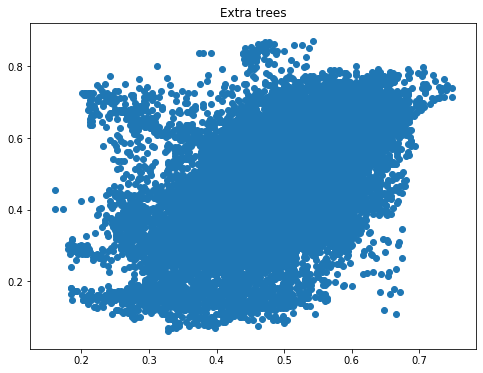

RMSE for  Extra trees  is  0.01900368811943053


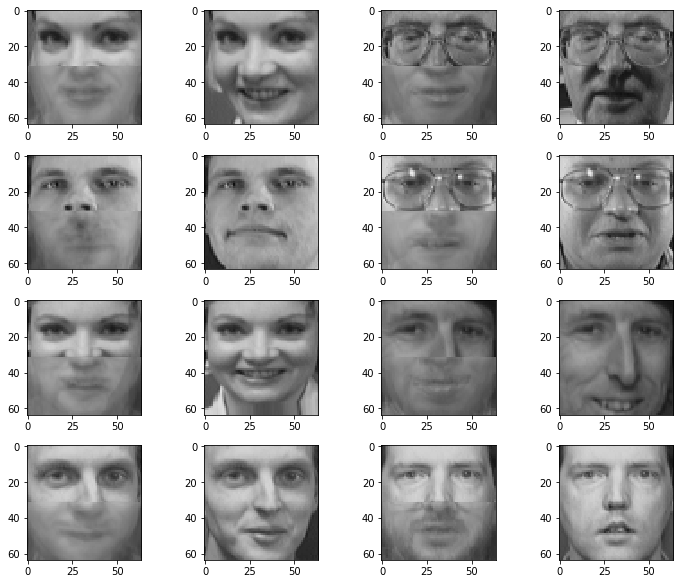

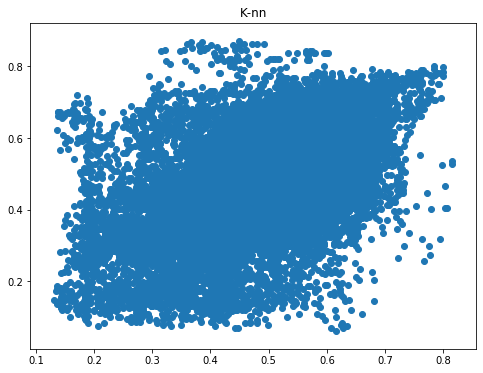

RMSE for  K-nn  is  0.020249195


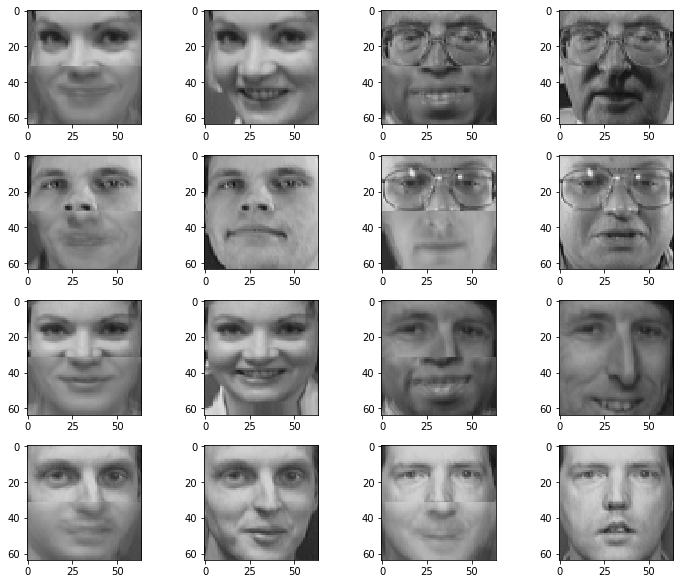

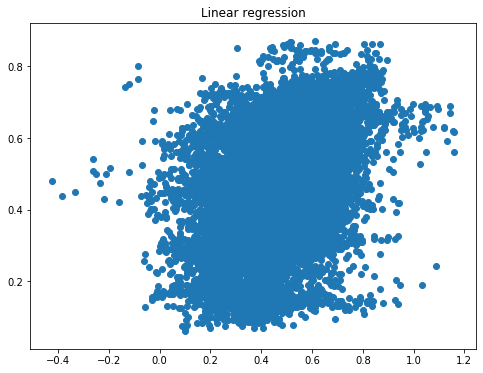

RMSE for  Linear regression  is  0.029426677


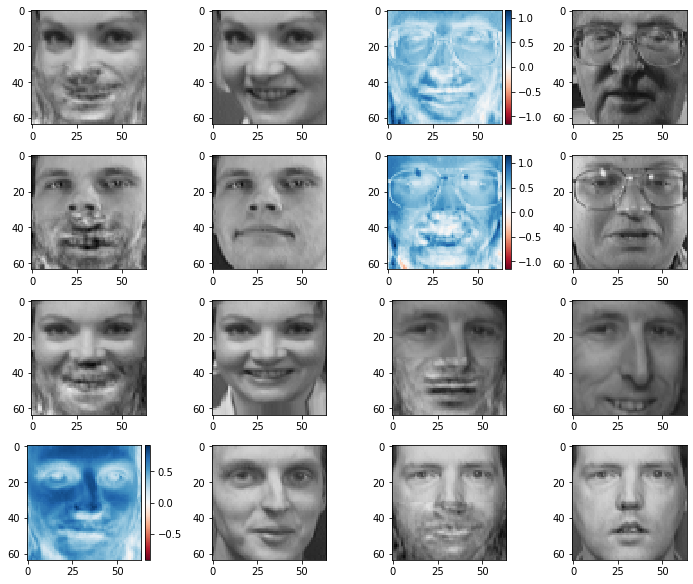

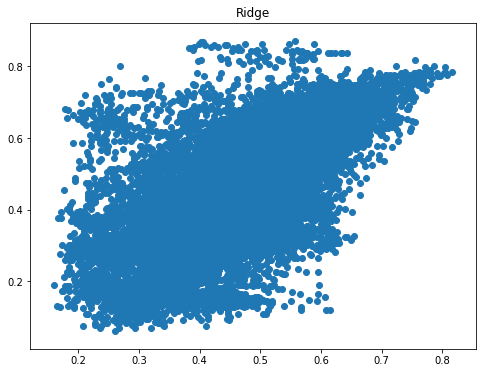

RMSE for  Ridge  is  0.01422377116690403


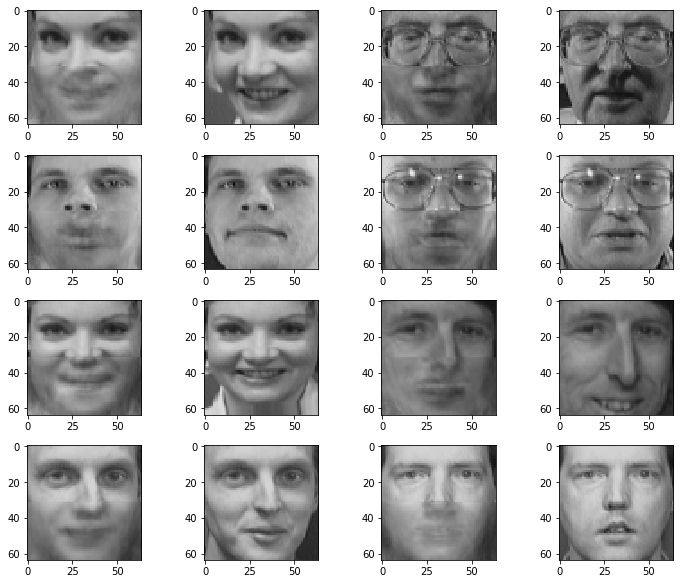

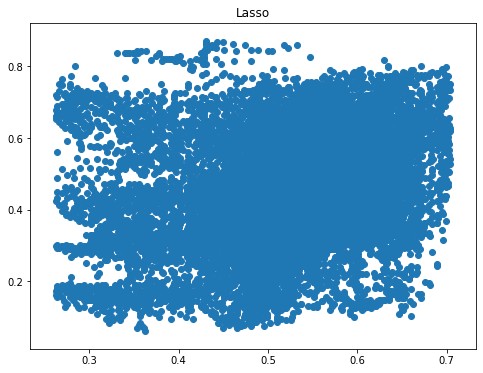

RMSE for  Lasso  is  0.027254924


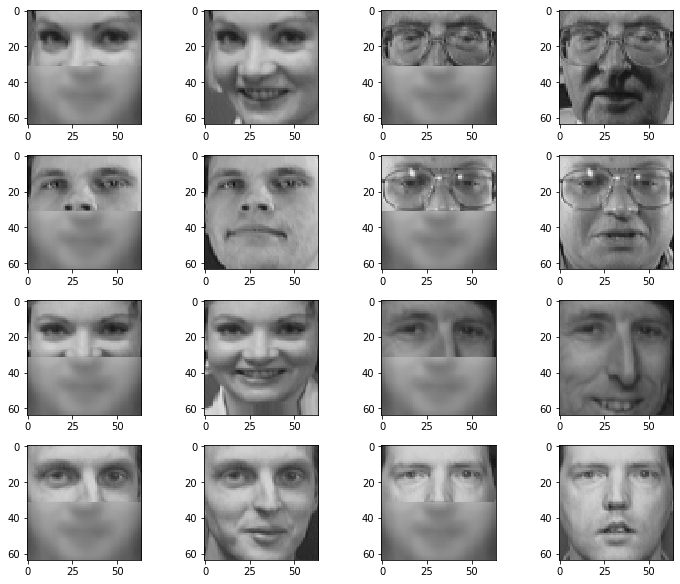

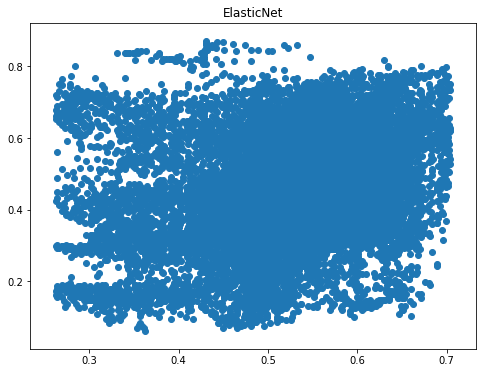

RMSE for  ElasticNet  is  0.027254924


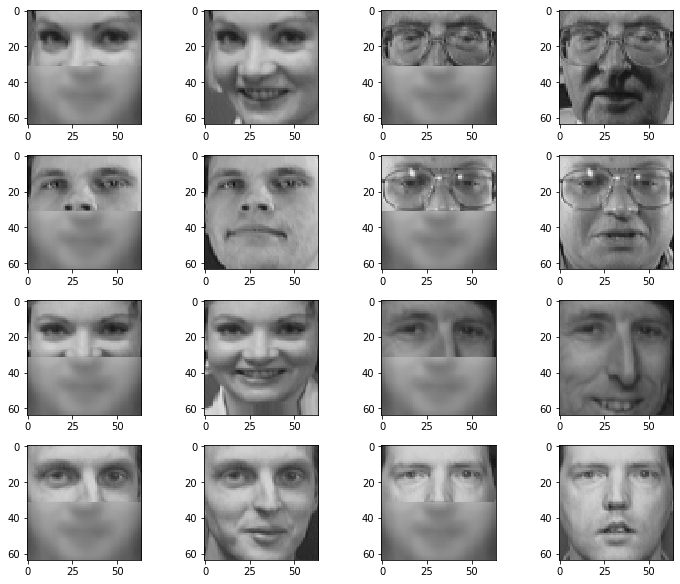

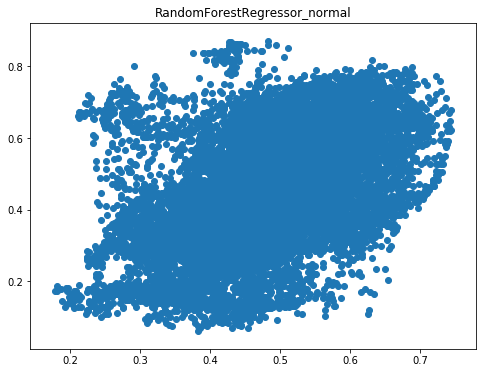

RMSE for  RandomForestRegressor_normal  is  0.018803750114975565


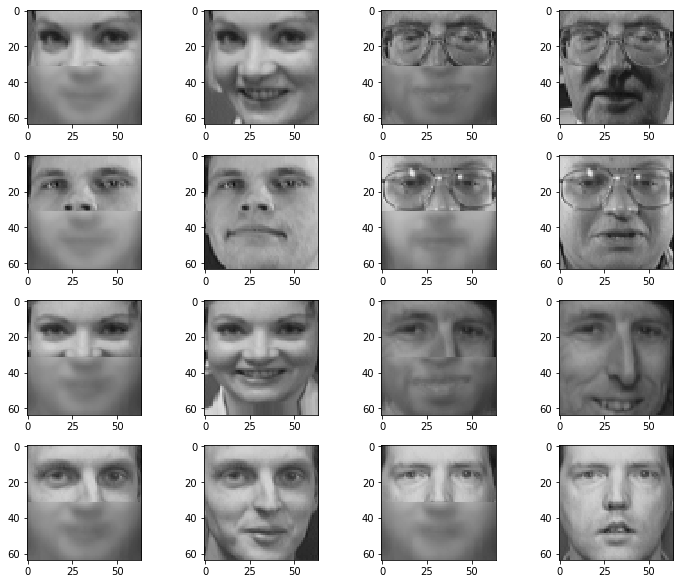

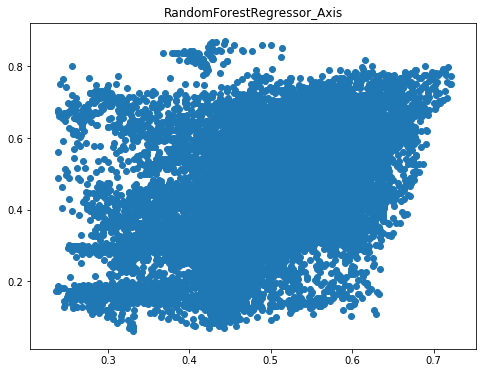

RMSE for  RandomForestRegressor_Axis  is  0.020889555054589264


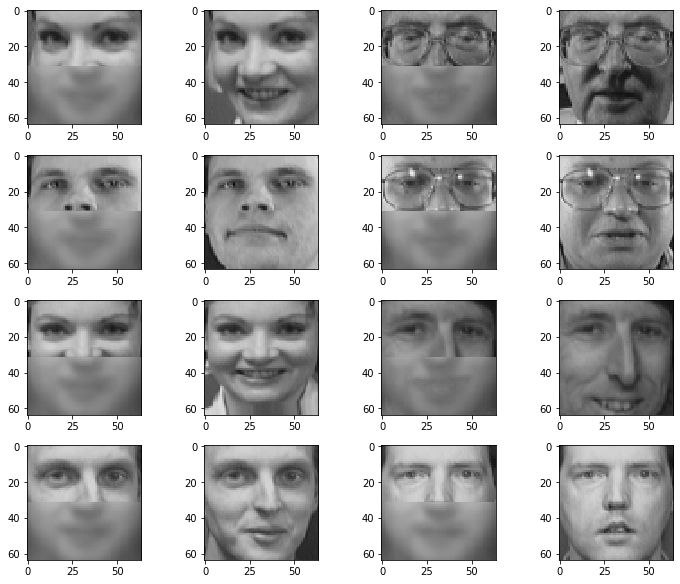

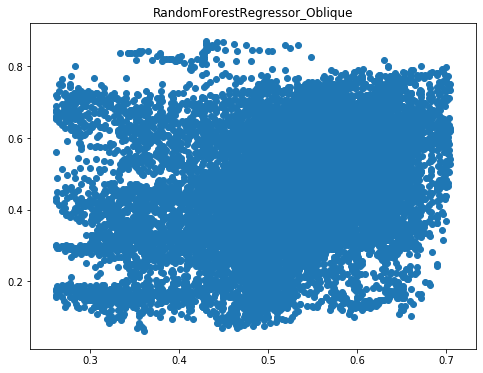

RMSE for  RandomForestRegressor_Oblique  is  0.027187819970297976


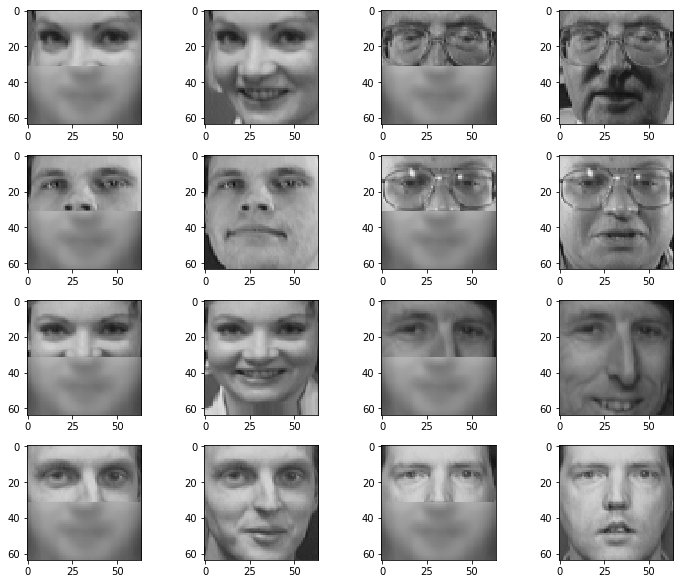

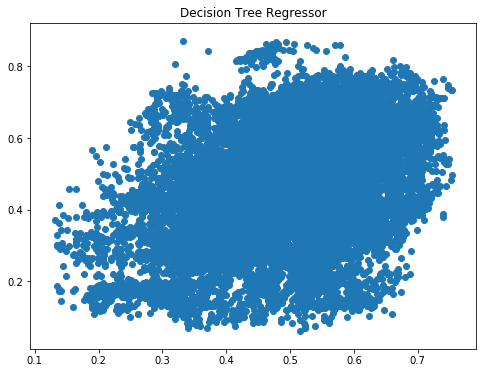

RMSE for  Decision Tree Regressor  is  0.02404402290919369


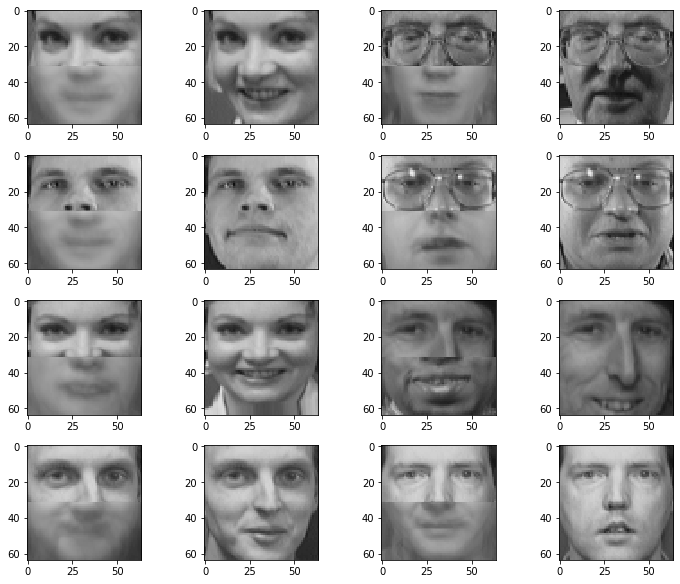

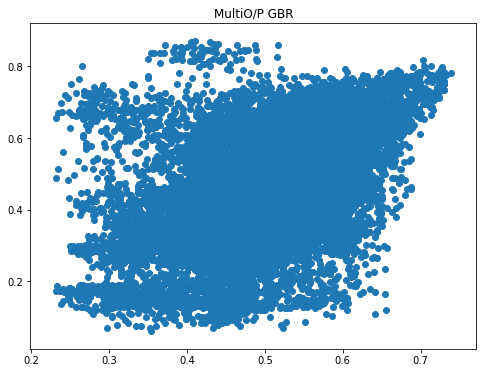

RMSE for  MultiO/P GBR  is  0.02032255995595469


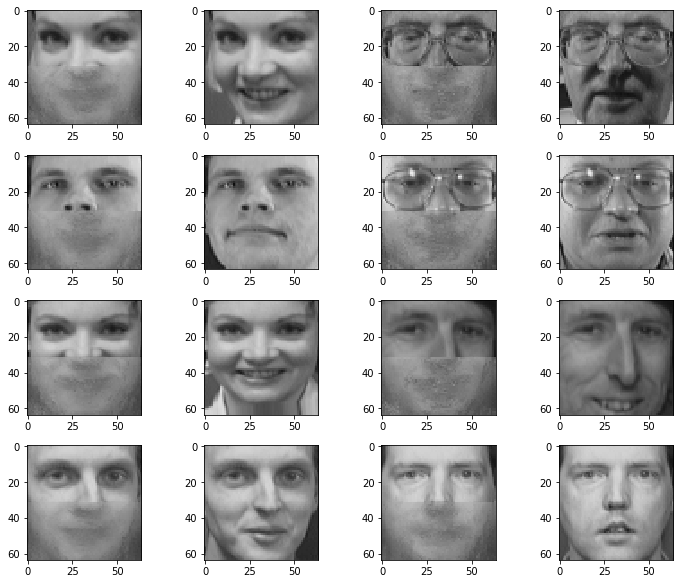

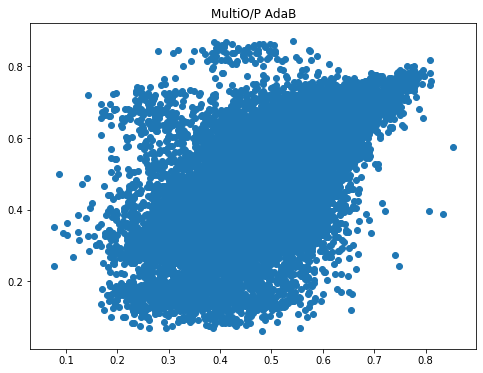

RMSE for  MultiO/P AdaB  is  0.01694091624651816


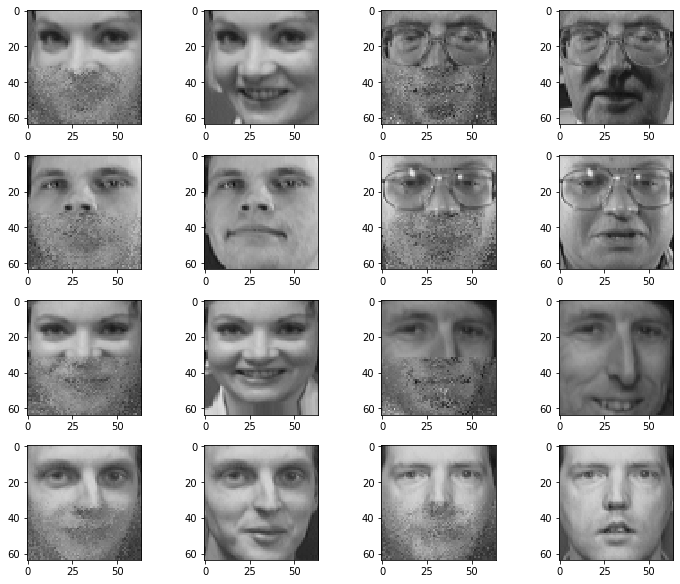

In [17]:
# 9.1 Create an empty dictionary to collect prediction values
y_test_predict = dict()
y_mse = dict()

for name, estimator in ESTIMATORS.items():     
    estimator.fit(X_train, y_train)                    # fit() with instantiated object
    y_test_predict[name] = estimator.predict(X_test)   # Make predictions and save it in dict under key: name
    y_mse[name] = mean_squared_error(y_test, estimator.predict(X_test))
    show_image(test,X_test,y_test_predict,name,n_faces,y_mse)
    